<a href="https://colab.research.google.com/github/tanmaybohra/Play-Store-App-Review-Analysis/blob/main/Playing_with_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
play_store = pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [4]:
play_store.shape

(10841, 13)

In [5]:
user_reviews.shape

(64295, 5)

In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
play_store.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
user_reviews.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_reviews.tail(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
play_store.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_reviews.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [6]:
play_store.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
play_store.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [8]:
user_reviews.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


In [9]:
user_reviews.isnull().any()

App                       False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool

In [10]:
play_store['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [11]:
play_store['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [12]:
play_store['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [13]:
play_store['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
data = play_store[play_store.Genres == 'February 11, 2018']

In [15]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
play_store['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [17]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [18]:
play_store.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver']

In [19]:
data_nan = play_store[play_store.Content_Rating == 'nan']

In [20]:
data_nan

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [21]:
play_store.columns[play_store.isna().any()].tolist()

['Rating', 'Type', 'Content_Rating', 'Current_Ver', 'Android_Ver']

In [22]:
play_store[play_store['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [23]:
play_store[play_store['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [24]:
play_store[play_store['Content_Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [25]:
play_store[play_store['Current_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [26]:
play_store[play_store['Android_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [27]:
# Dropping Duplicate Apps
duplicate = play_store[play_store.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [28]:
duplicates = play_store[play_store.duplicated(keep = 'last')]
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0,18976,35M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"June 6, 2018",3.19.11,5.0 and up
3788,NBC News,NEWS_AND_MAGAZINES,4.1,63020,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"February 13, 2018",Varies with device,Varies with device
3790,USA TODAY,NEWS_AND_MAGAZINES,4.1,49259,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
3792,CNN Breaking US & World News,NEWS_AND_MAGAZINES,4.0,293080,25M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 6, 2018",5.17,4.4 and up


In [29]:
from csv import reader
opened_file = open('/content/drive/MyDrive/Copy of Play Store Data.csv')
read_file = reader(opened_file)
android = list(read_file)
print(android)
android_header = android[0]
# print(android_header)
android = android[1:]

def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line between rows

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

### Exploring the android data set ###
print(android_header)
print('\n')
explore_data(android, 0, 3, True)

for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)


[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], ['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'], ['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up'], ['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up'], ['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up'], ['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyon

In [30]:
### Counting the duplicate apps ###
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    unique_apps.append(name)

print(len(duplicate_apps))
print(duplicate_apps[:15])
print(len(unique_apps))
print(unique_apps[:15])

1181
['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']
10841
['Photo Editor & Candy Camera & Grid & ScrapBook', 'Coloring book moana', 'U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book', 'Paper flowers instructions', 'Smoke Effect Photo Maker - Smoke Editor', 'Infinite Painter', 'Garden Coloring Book', 'Kids Paint Free - Drawing Fun', 'Text on Photo - Fonteee', 'Name Art Photo Editor - Focus n Filters', 'Tattoo Name On My Photo Editor', 'Mandala Coloring Book', '3D Color Pixel by Number - Sandbox Art Coloring']


In [ ]:
# Converting characters to numeric


In [ ]:
# Let us write a function to capture the maximum reviews
### Building a dictionary {'app_name': max_number_of reviews, ...} ###
# reviews_max = {}

# for app in android:
#     name = app[0]
#     n_reviews = float(app[3])

#     if name in reviews_max and reviews_max[name] < n_reviews:
#         reviews_max[name] = n_reviews

#     elif name not in reviews_max: # Don't use else here!
#         reviews_max[name] = n_reviews

In [31]:
android[4913][0]

'Trane Interactive Smart AC'

In [32]:
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [33]:
user_reviews.Translated_Review.nunique()

27994

In [34]:
user_reviews[user_reviews['Translated_Review'].isna()]

# We need to drop these

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f830d8b1b50>]],
      dtype=object)

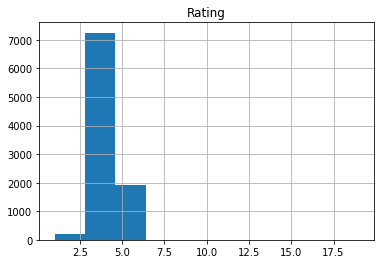

In [35]:
play_store.hist()

In [36]:
play_store.drop([10472],inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f830d7a4e90>]],
      dtype=object)

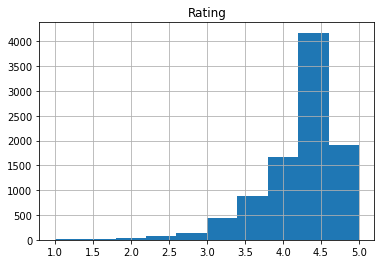

In [37]:
play_store.hist()

In [38]:
# Defining the function to fill the null values with the median.
def impute_median(series):
  return series.fillna(series.median())

In [39]:
play_store.Rating = play_store['Rating'].transform(impute_median)

In [40]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

In [42]:
# Mode of categorical values
print(play_store['Type'].mode())
print(play_store['Current_Ver'].mode())
print(play_store['Android_Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [45]:
# Filling the missing categorical values with Mode
play_store['Type'].fillna(str(play_store['Type'].mode().values[0]),inplace=True)
play_store['Current_Ver'].fillna(str(play_store['Current_Ver'].mode().values[0]),inplace=True)
play_store['Android_Ver'].fillna(str(play_store['Android_Ver'].mode().values[0]),inplace=True)

In [46]:
# Counting the number of null values in each column
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [47]:
# Converting Price,Reviews,Ratings into numerical values
play_store['Price'] = play_store['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
play_store['Price'] = play_store['Price'].apply(lambda x : float(x))
play_store['Reviews'] = pd.to_numeric(play_store['Reviews'],errors='coerce')

In [48]:
play_store['Installs'] = play_store['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
play_store['Installs'] = play_store['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
play_store['Installs'] = play_store['Installs'].apply(lambda x : float(x))

In [49]:
# Creating category for categorical data
grp = play_store.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

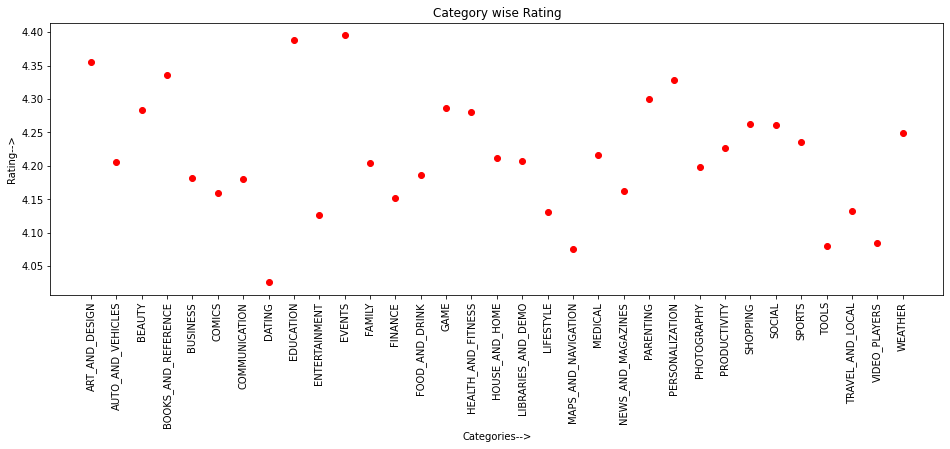

In [50]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro')
plt.xticks(rotation = 90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

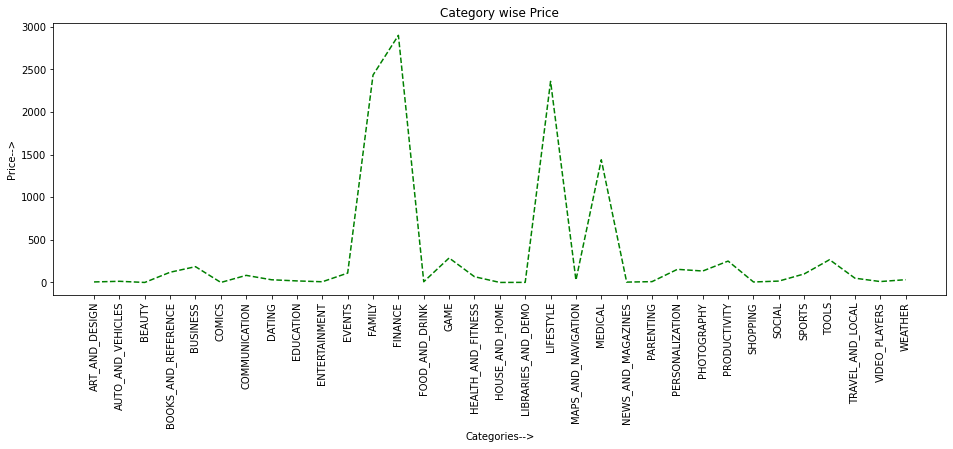

In [51]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='g')
plt.xticks(rotation=90)
plt.title('Category wise Price')
plt.xlabel('Categories-->')
plt.ylabel('Price-->')
plt.show()

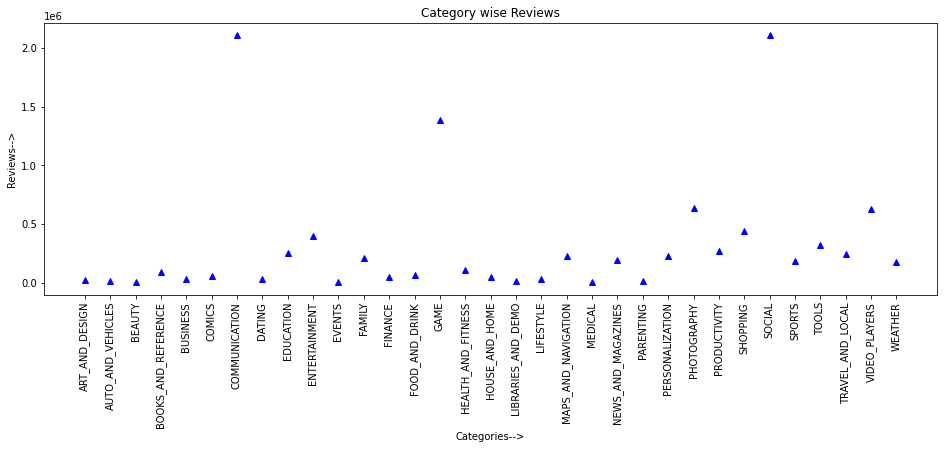

In [52]:
plt.figure(figsize=(16,5))
plt.plot(z,'g^',color='b')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

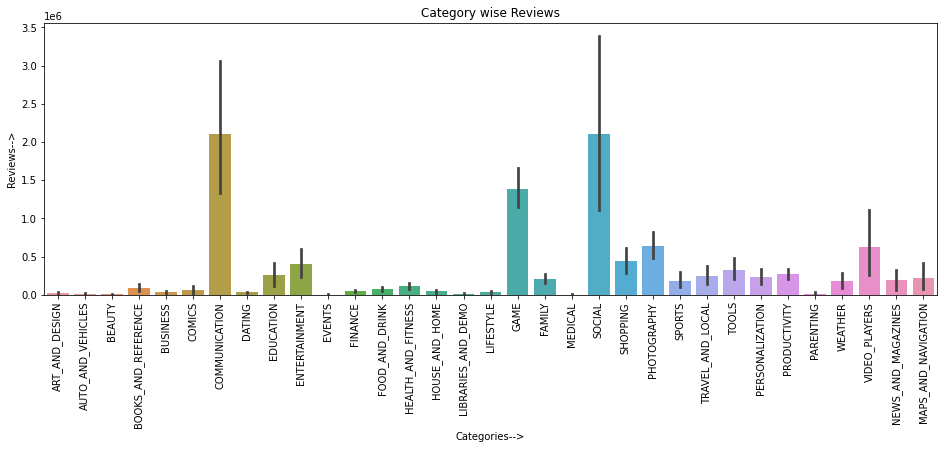

In [53]:
plt.figure(figsize=(16,5))
sns.barplot(x=play_store['Category'],y=play_store['Reviews'])
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

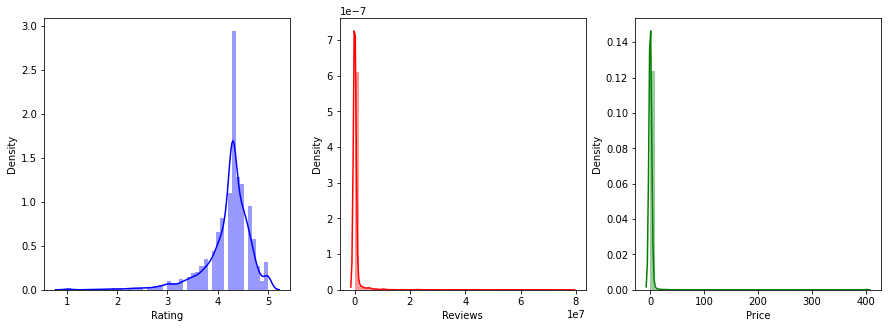

In [54]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.distplot(play_store['Rating'],hist=True,color='b',ax=ax1)
sns.distplot(play_store['Reviews'],hist=True,color='r',ax=ax2)
sns.distplot(play_store['Price'],hist=True,color='g',ax=ax3)
f.set_size_inches(15, 5)

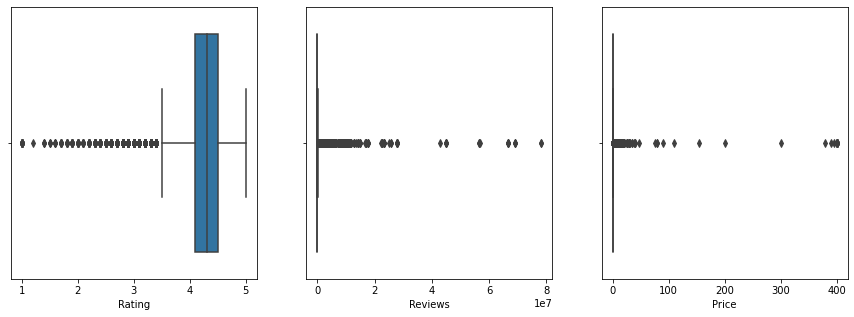

In [55]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.boxplot(x='Rating',data=play_store,ax=ax1)
sns.boxplot(x='Reviews',data=play_store,ax=ax2)
sns.boxplot(x='Price',data=play_store,ax=ax3)
f.set_size_inches(15, 5)

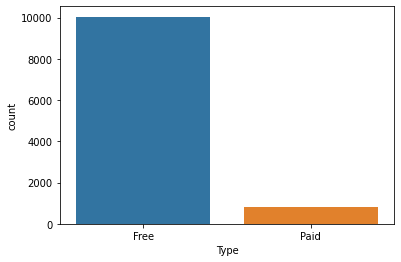

In [56]:
sns.countplot(x='Type',data=play_store)

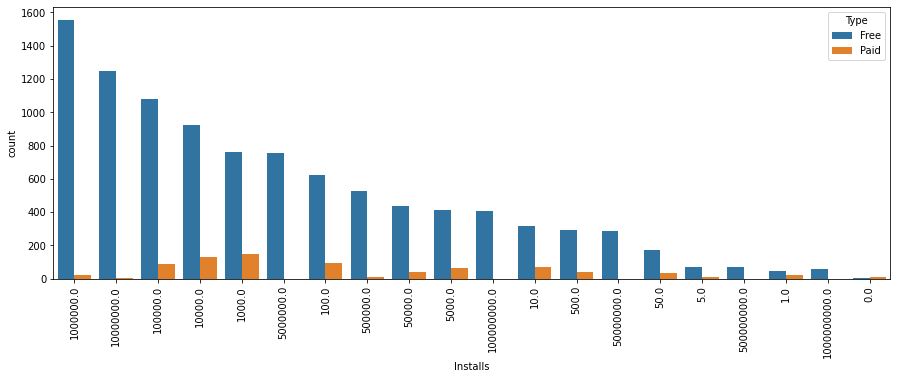

In [57]:
f,ax1 = plt.subplots(ncols=1)
sns.countplot(x = 'Installs',hue='Type',data=play_store,ax=ax1,order=play_store['Installs'].value_counts().index)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

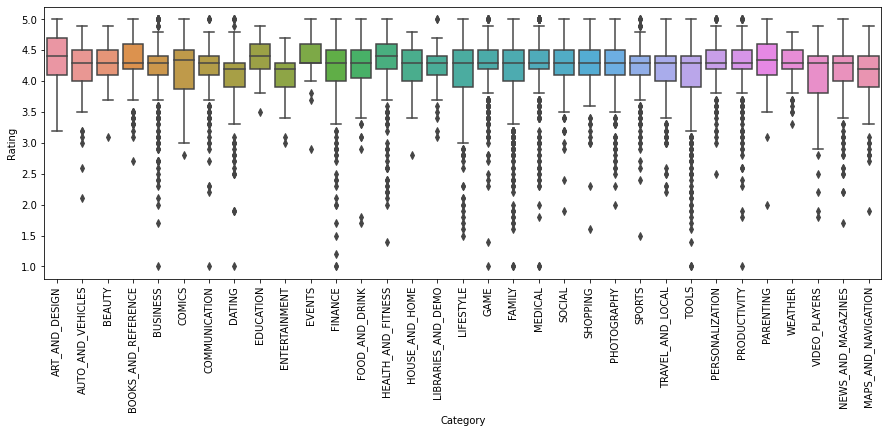

In [58]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Category',y='Rating',data=play_store)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

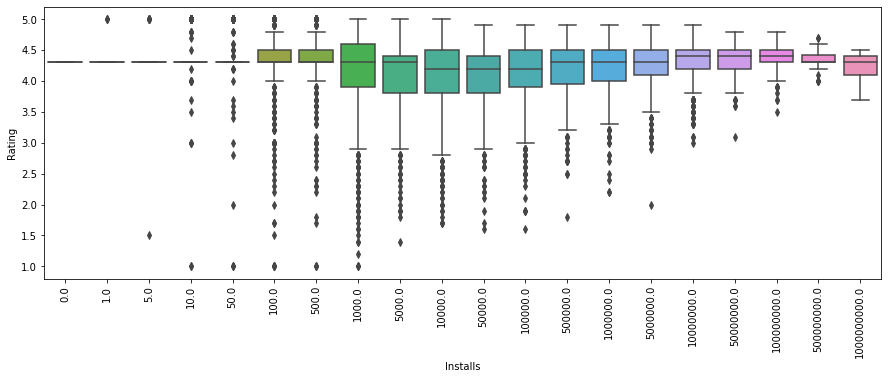

In [59]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Installs',y='Rating',data=play_store)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

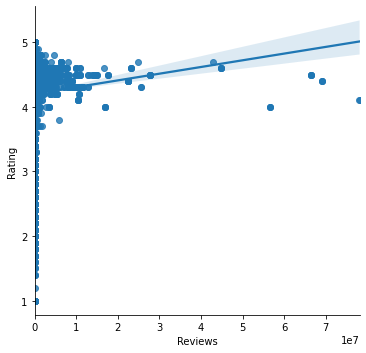

In [60]:
g = sns.lmplot(x = 'Reviews',y='Rating',data=play_store)

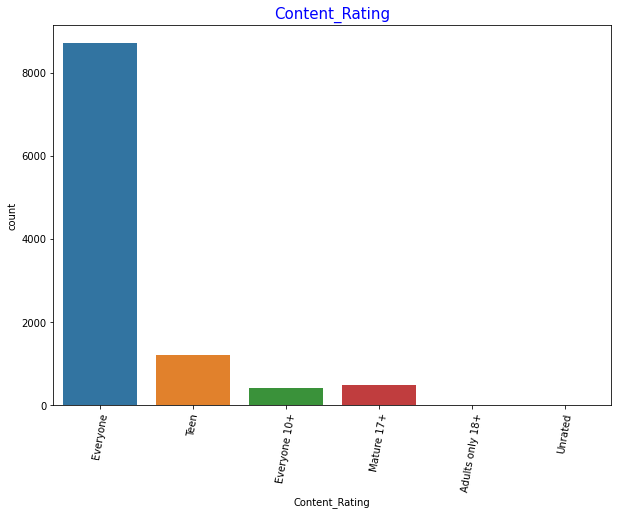

In [63]:
plt.figure(figsize=(10,7))
sns.countplot(data=play_store, x='Content_Rating')
plt.xticks(rotation=80)
plt.title('Content_Rating',color = 'blue',fontsize=15)
plt.show()

In [64]:
play_store['Reviews'] = play_store.Reviews.replace("0.0",0)
play_store['Reviews'] = play_store.Reviews.replace("3.0M",3000000.0)
play_store['Reviews'] = play_store['Reviews'].astype(float)
play_store['Reviews'].dtype

dtype('float64')

In [65]:
play_store['Size'] = play_store.Size.replace("Varies with device",np.nan)
play_store['Size'] = play_store.Size.str.replace("M","000")
play_store['Size'] = play_store.Size.str.replace("k","")
play_store['Size'] = play_store.Size.replace("1,000+",1000)
play_store['Size'] =play_store['Size'].astype(float)
play_store['Size'].dtype

dtype('float64')

In [66]:
play_store['Installs'] = play_store.Installs.replace("Free",np.nan)
play_store['Installs'] = play_store['Installs'].astype(float)
play_store['Installs'].dtype

dtype('float64')

In [67]:
play_store['Installs'] = pd.to_numeric(play_store['Installs'])

In [68]:
play_store['Price'] = pd.to_numeric(play_store['Price'])

In [70]:
play_store['Last_Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [72]:
play_store['Last_Updated'] = pd.to_datetime(play_store['Last_Updated'])
play_store['Last_Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last_Updated, Length: 10840, dtype: datetime64[ns]

In [73]:
play_store.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063166,0.064565,0.045496,-0.019318
Reviews,0.063166,1.000000,0.233791,0.643122,-0.009667
Size,0.064565,0.233791,1.000000,0.164608,-0.022772
Installs,0.045496,0.643122,0.164608,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.022772,-0.011689,1.000000


In [74]:
play_store.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,19579.419913,1.546434e+07,1.027368
std,0.480342,2.927761e+06,24042.062020,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [76]:
# Top Categories
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000' 

In [77]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [78]:
play_store['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

In [79]:
y = play_store['Category'].value_counts().index
x = play_store['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

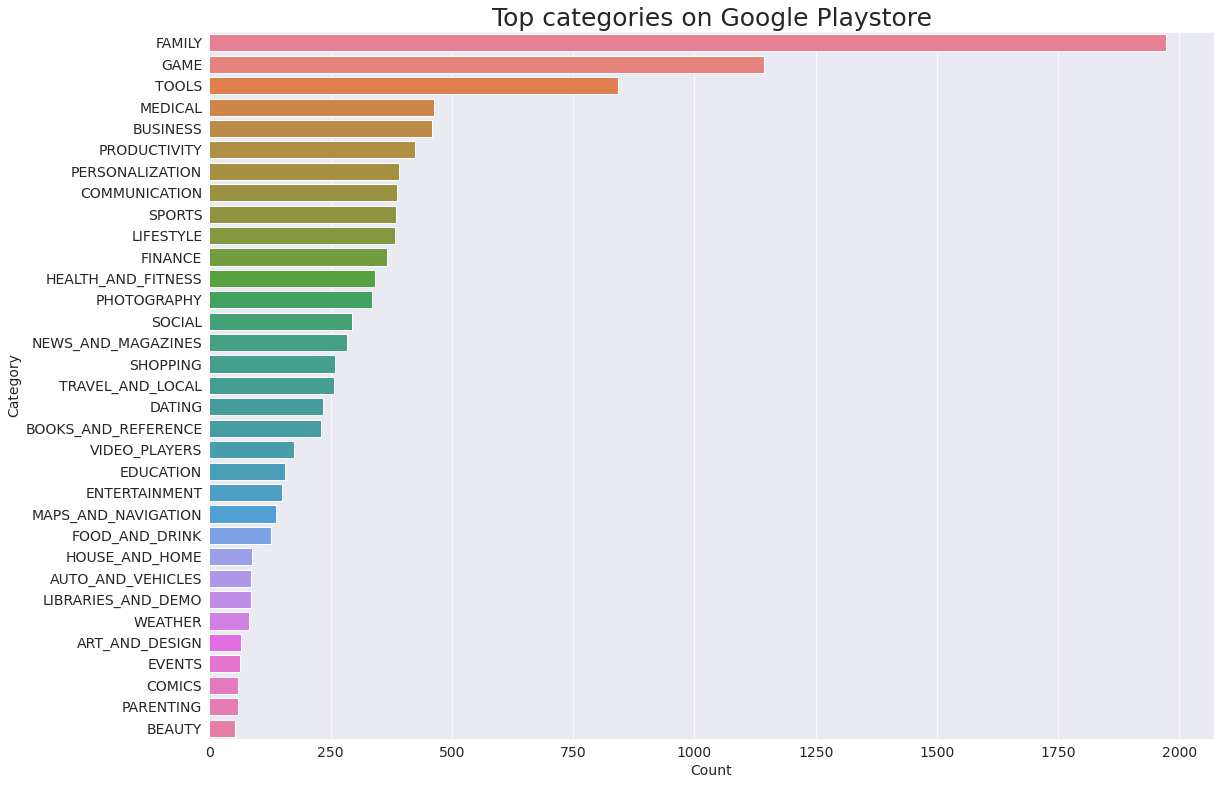

In [80]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

In [81]:
x2 = play_store['Content_Rating'].value_counts().index
y2 = play_store['Content_Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

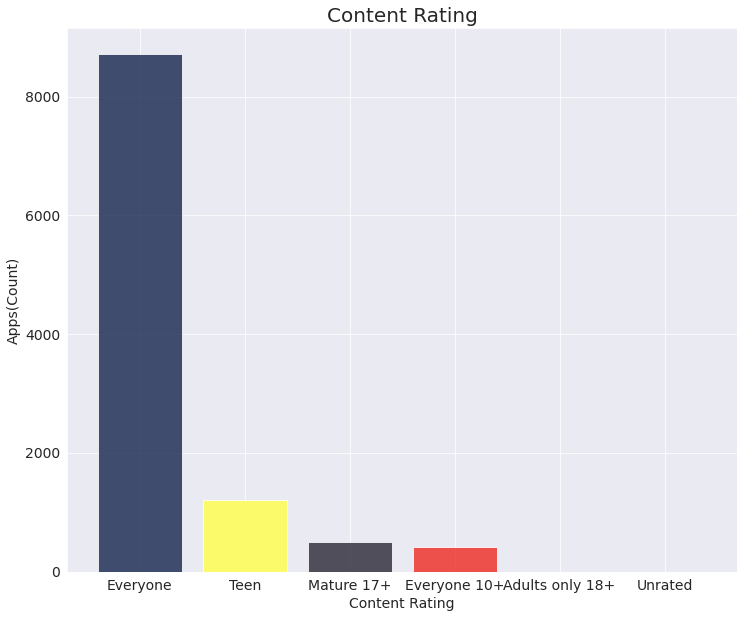

In [82]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

In [83]:
# Distribution of Rating
play_store['Rating'].describe()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

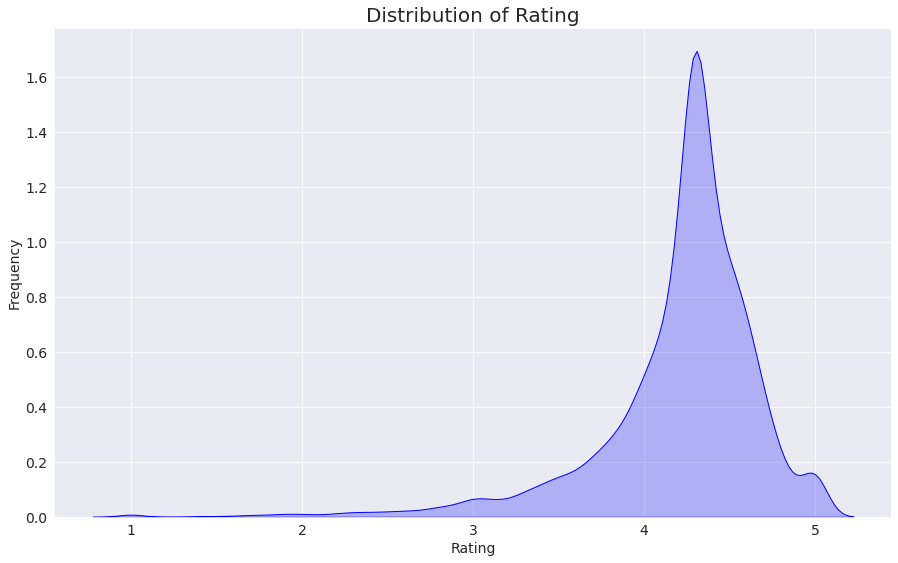

In [84]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(play_store.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);